In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import pymc3 as pm
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from utils import *
from plotutils import *
from pymc3 import model_to_graphviz
plt.style.use("fivethirtyeight")

C:\Users\tanve\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\tanve\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
with pm.Model() as simple_cauchy:
    theta = pm.Cauchy('tau', 0, 5, shape = 10)

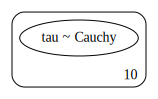

In [3]:
model_to_graphviz(simple_cauchy)

In [4]:
with simple_cauchy:
    trace = pm.sample(1000, cores = 1, chains = 4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [tau]
100%|██████████| 1500/1500 [00:11<00:00, 128.04it/s]
The acceptance probability does not match the target. It is 0.878703768842965, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9038479110739455, but should be close to 0.8. Try to increase the number of tuning steps.
The gelman-rubin statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


In [5]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
tau__0,-1.493262,39.872661,1.884630,-44.631624,42.214422,354.791229,1.010072
tau__1,6.912825,248.832921,19.760878,-65.120126,74.044837,194.267904,1.002344
tau__2,-0.656563,43.106111,0.899975,-53.538087,54.887111,1859.088894,1.000031
tau__3,-0.182814,44.762025,1.629384,-62.015843,66.705590,724.697005,1.001540
tau__4,-10.978978,186.408303,7.696372,-85.231584,74.124734,387.590815,1.004277
tau__5,3.747087,102.537361,3.703464,-172.107730,106.359380,571.691260,1.007050
tau__6,-5.139468,92.977677,4.291969,-120.779468,100.778029,292.308694,1.005743
tau__7,1.921699,64.227195,2.388667,-67.765847,51.420845,781.352531,1.002631
tau__8,-76.140496,469.935328,44.120061,-155.374558,144.651099,28.822339,1.052659
tau__9,0.690973,77.948494,1.566361,-67.163090,82.027220,1560.286348,1.000510


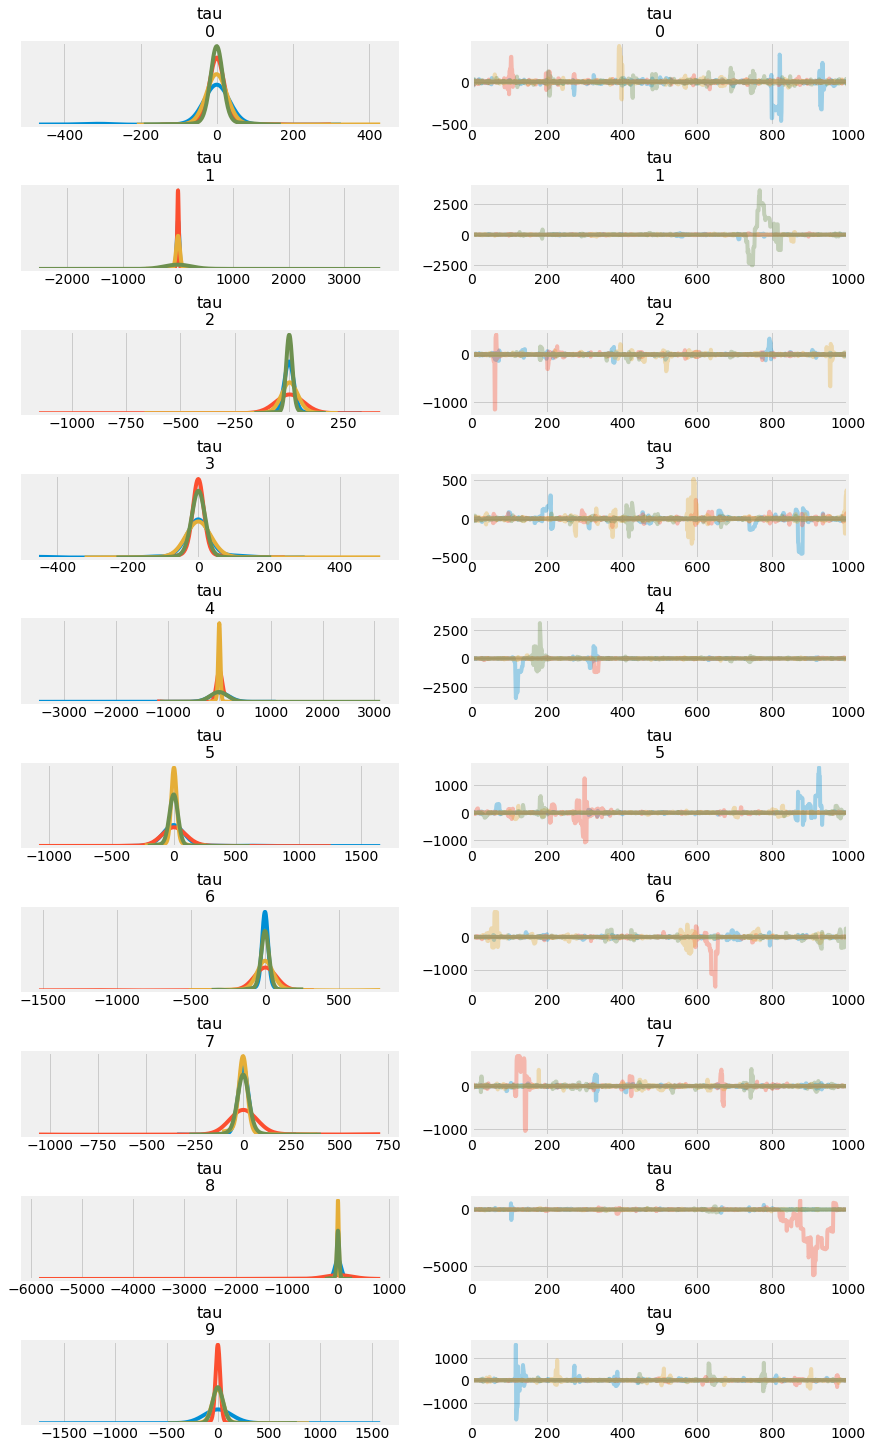

In [6]:
pm.traceplot(trace);

In [25]:
trace.get_values('tau', burn = 100, thin=10, chains=[0])[:,8]

array([ 6.21266366e+00, -3.87941044e+01, -1.89802536e+00,  1.04763353e+00,
        4.23078406e+00,  1.28783529e+01, -1.53576187e+00,  4.22168485e+00,
       -4.37981018e+00,  1.22715369e+01,  9.14772803e+00,  4.92890812e+00,
       -6.91658422e+00, -3.42943268e+01,  4.78249972e-01, -1.77427121e+01,
        9.31004401e+00,  1.09480238e+00,  4.17208848e-01,  7.86724352e-01,
        3.19520555e+00,  8.24170358e+00,  4.89399151e+00, -3.64063407e-01,
        9.65239887e-01,  2.95316084e+00,  6.16211108e+00, -1.13848385e+01,
        4.17579933e+00, -7.03640448e+00,  5.94926741e+00, -6.54230767e+00,
       -3.55922495e+00,  1.37191866e+00, -3.24465382e+00, -3.71071733e+00,
        9.70798242e+00, -5.39956546e-01,  9.73091573e-01,  3.45130556e+00,
       -1.30116924e+01,  1.45551920e+00,  5.17899702e-01,  2.91202905e+00,
        5.79503380e+00,  1.59924784e+01, -1.69963340e+00,  9.36307245e+00,
       -2.91143234e+00, -8.40990037e-01,  9.50537804e+00,  1.83681612e+00,
        1.77528808e+01, -

In [10]:
trace.varnames

['tau']

In [14]:
np.array(trace['tau']).shape

(4000, 10)

In [29]:
traces_by_chain = np.zeros((4, 1000))

for i in range(4):
    #traces_by_chain[i] = np.array(trace['tau'])[:,8][i*1000:(i+1)*1000]
    traces_by_chain[i] = trace.get_values('tau', chains=[i])[:,8]

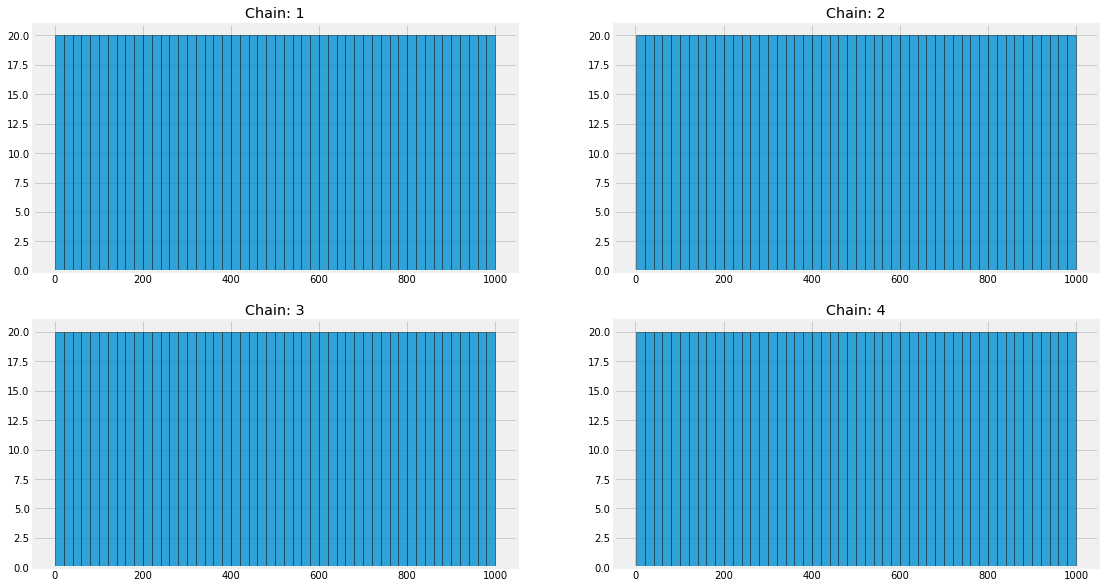

In [30]:
rows = 2
cols = 2
fig = plt.figure(figsize=(17, 10))
gs = GridSpec(rows, cols)

for i in range(rows*cols):
    ax = fig.add_subplot(gs[i])
    rankplot(traces_by_chain[i])
    ax.set_title(f"Chain: {i + 1}")

In [ ]:
np